In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [5]:
cols = ['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp',
'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets','Total Length of Fwd Packets', 'Total Length of Bwd Packets',
'Fwd Packet Length Max', 'Fwd Packet Length Min','Fwd Packet Length Mean','Fwd Packet Length Std', 'Bwd Packet Length Max',
'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean',
'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count',
'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size',
'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk','Fwd Avg Bulk Rate',
'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets',
'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
'Active Mean', 'Active Std', 'Active Max', 'Active Min','Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min','SimillarHTTP',
'Inbound', 'Label']

In [6]:
print(len(cols))

87


In [7]:
training_path="C:/Users/JO/Documents/CS_GroupProject/training.csv"
validation_path="C:/Users/JO/Documents/CS_GroupProject/validation.csv"
testing_path="C:/Users/JO/Documents/CS_GroupProject/testing.csv"


In [8]:
dataset = pd.read_csv(training_path,names = cols, header=None,skiprows = 1)#, names = cols, skiprows = 1)
dataset.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-746-24675-17,172.16.0.5,746,192.168.50.1,24675,17,2018-12-01 11:07:56.502353,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-851-5766-17,172.16.0.5,851,192.168.50.1,5766,17,2018-12-01 11:06:32.000712,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-935-24548-17,172.16.0.5,935,192.168.50.1,24548,17,2018-12-01 11:08:48.524934,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-719-12510-17,172.16.0.5,719,192.168.50.1,12510,17,2018-12-01 11:13:23.585969,48,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-984-61717-17,172.16.0.5,984,192.168.50.1,61717,17,2018-12-01 11:12:57.299430,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [9]:
dataset_val = pd.read_csv(validation_path, names = cols, header=None,skiprows = 1)#, skiprows = 1

In [10]:
dataset_val.head(5)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.1-673-62967-17,172.16.0.5,673,192.168.50.1,62967,17,2018-12-01 11:15:59.921207,2,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
1,172.16.0.5-192.168.50.1-564-39431-17,172.16.0.5,564,192.168.50.1,39431,17,2018-12-01 11:16:03.133272,49,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
2,172.16.0.5-192.168.50.1-642-56652-17,172.16.0.5,642,192.168.50.1,56652,17,2018-12-01 11:16:03.356155,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
3,172.16.0.5-192.168.50.1-980-6257-17,172.16.0.5,980,192.168.50.1,6257,17,2018-12-01 11:15:58.247609,3,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS
4,172.16.0.5-192.168.50.1-914-6074-17,172.16.0.5,914,192.168.50.1,6074,17,2018-12-01 11:16:01.963154,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,DrDoS_DNS


In [11]:
len(dataset_val.columns)

87

##### Drop Categorical features

In [12]:
dataset.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'], axis = 1, inplace = True)
dataset_val.drop(['Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp'], axis = 1, inplace = True)

#### Drop Columns with only one value

In [13]:
dataset.drop(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count',
              'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 
             'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis = 1, inplace = True)
dataset_val.drop(['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'FIN Flag Count', 'PSH Flag Count', 'ECE Flag Count',
              'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 
             'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'], axis = 1, inplace = True)

In [14]:
from sklearn.preprocessing import LabelEncoder

dataset['Label'] = dataset['Label'].replace({ 'DrDoS_DNS': 1})
dataset['Label'] = dataset['Label'].replace({ 'BENIGN': 0})
dataset_val['Label'] = dataset_val['Label'].replace({ 'DrDoS_DNS': 1})
dataset_val['Label'] = dataset_val['Label'].replace({ 'BENIGN': 0})

lbl_encoder = LabelEncoder()
dataset['SimillarHTTP'] = dataset['SimillarHTTP'].apply(lambda x : pd.to_numeric(x, errors='coerce'))
dataset_val['SimillarHTTP'] = dataset['SimillarHTTP'].apply(lambda x : pd.to_numeric(x, errors='coerce'))
dataset['SimillarHTTP'] = lbl_encoder.fit_transform(dataset['SimillarHTTP'])


In [15]:
dataset_val['SimillarHTTP'] = lbl_encoder.fit_transform(dataset_val['SimillarHTTP'])

#### Nan values handlation

In [16]:
corr_df = pd.DataFrame()
corr_df['Label'] = dataset['Label']
corr_df['Flow Bytes/s'] = dataset['Flow Bytes/s']

<AxesSubplot:>

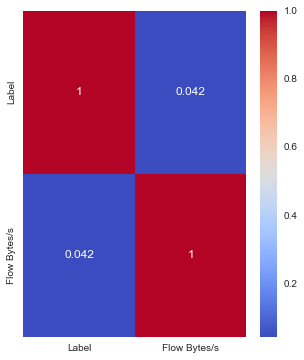

In [17]:
plt.figure(figsize=(5,6))
sns.heatmap(corr_df.corr(), annot = True, cmap = 'coolwarm')

In [18]:
# Replacing infinite with nan
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
# replacing nan with mean values 
# df.apply(lambda x: x.fillna(x.mean()),axis=0)
dataset.fillna(value=dataset.mean(), inplace=True)

In [19]:
# Replacing infinite with nan
dataset_val.replace([np.inf, -np.inf], np.nan, inplace=True)
# replacing nan with mean values 
# df.apply(lambda x: x.fillna(x.mean()),axis=0)
dataset_val.fillna(value=dataset_val.mean(), inplace=True)

In [20]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [21]:
dataset.drop(['Flow Bytes/s'], axis = 1, inplace = True)
xtrain, ytrain = dataset.iloc[:,:-1], dataset['Label']
dataset_val.drop(['Flow Bytes/s'], axis = 1, inplace = True)
x_val, y_val = dataset_val.iloc[:,:-1], dataset_val['Label']
# dropping the columns with nan values as the correlation is very low

In [22]:
print(len(dataset.columns))
print(len(dataset_val.columns))

67
67


In [23]:
# ANOVA feature selection for numeric input and categorical output
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# generate dataset
#X, y = make_classification(n_samples=100, n_features=20, n_informative=2)
# define feature selection

In [24]:
print(ytrain.isnull().values.any())


False


<AxesSubplot:>

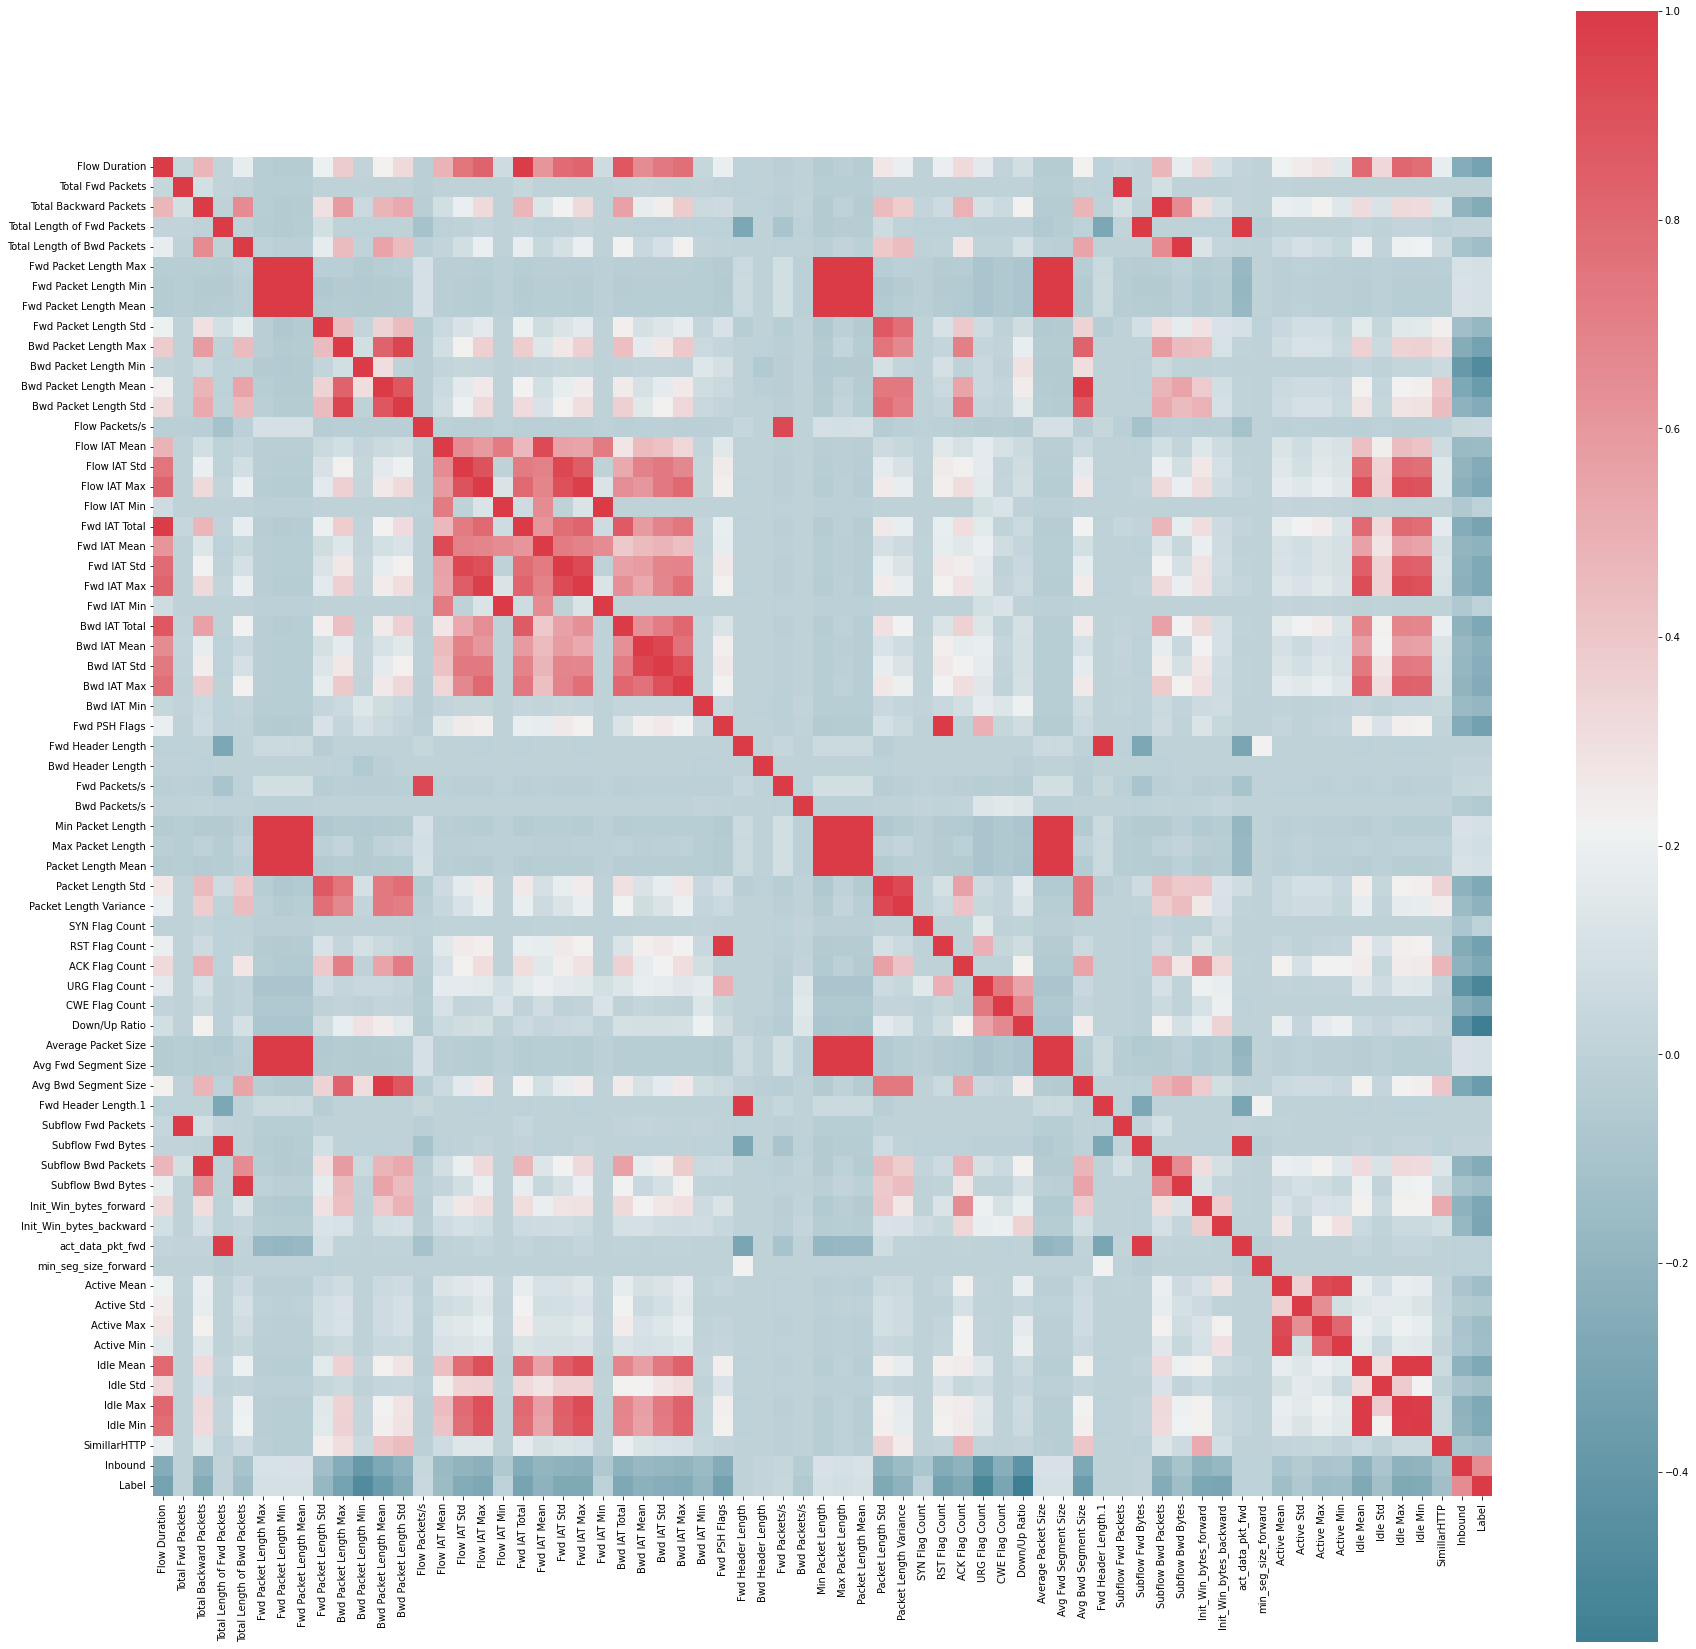

In [22]:
# run correlation matrix and plot
f, ax = plt.subplots(figsize=(30, 30))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)#annot=True,fmt=".1"

In [25]:
from sklearn.feature_selection import SelectKBest

In [24]:
#xtrain, ytrain 
#feature_selector = SelectKBest(score_func=f_classif, k = "all")
#fit = feature_selector.fit(xtrain,ytrain)


In [25]:

#p_values = pd.DataFrame(fit.pvalues_)
#scores = pd.DataFrame(fit.scores_)
#input_variable_names = pd.DataFrame(xtrain.columns)

In [26]:
# summary_stats = pd.concat([input_variable_names, p_values, scores], axis = 1)
# summary_stats.columns = ["input_variable", "p_value", "chi2_score"]
# summary_stats.sort_values(by = "p_value", inplace = True)


In [27]:
# p_value_threshold = 0.05
# score_threshold = 5


In [28]:


# selected_variables = summary_stats.loc[(summary_stats["chi2_score"] >= score_threshold) &
#                                        (summary_stats["p_value"] <= p_value_threshold)]
# selected_variables = selected_variables["input_variable"].tolist()
# X_new = xtrain[selected_variables]

In [29]:
#X_new.shape

(4002000, 62)

In [17]:

#fs = SelectKBest(score_func=f_classif, k="all")
# apply feature selection
#X_selected = fs.fit_transform(xtrain, ytrain)
#print(X_selected.shape)

(4002000, 66)


In [27]:
from sklearn.feature_selection import RFECV 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [28]:
regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(xtrain,ytrain)

optimal_feature_count = feature_selector.n_features_
print(f"Optimal numer of features: {optimal_feature_count}")

Optimal numer of features: 10


In [29]:
optimal_feature_idx=fit.get_support(indices=True)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

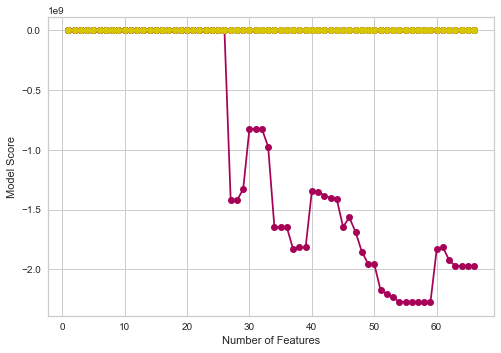

In [30]:

X_new = xtrain.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.grid_scores_) + 1), fit.grid_scores_, marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.grid_scores_), 4)})")
plt.tight_layout() 
plt.show()

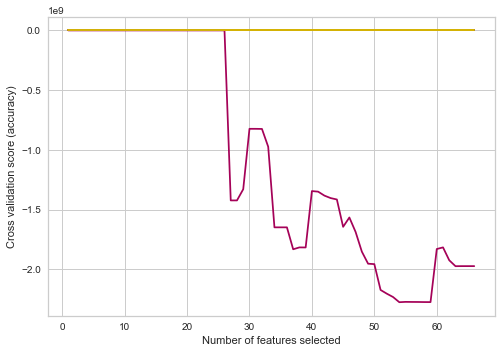

In [31]:
min_features_to_select = 1  # Minimum number of features to consider
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(fit.grid_scores_) + min_features_to_select),
    fit.grid_scores_,
)
plt.show()

In [32]:
#(feature_selector.ranking_).plot(kind="barh",color='teal')
#plt.show()

In [33]:
feature_selector.get_support(indices=True)

array([10, 28, 38, 39, 40, 41, 42, 43, 64, 65], dtype=int64)

In [34]:
X_new.head(10)

,Bwd Packet Length Min,Fwd PSH Flags,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,SimillarHTTP,Inbound
0,0.0,0,0,0,0,0,0,0.0,0,1
1,0.0,0,0,0,0,0,0,0.0,0,1
2,0.0,0,0,0,0,0,0,0.0,0,1
3,0.0,0,0,0,0,0,0,0.0,0,1
4,0.0,0,0,0,0,0,0,0.0,0,1
5,0.0,0,0,0,0,0,0,0.0,0,1
6,0.0,0,0,0,0,0,0,0.0,0,1
7,0.0,0,0,0,0,0,0,0.0,0,1
8,0.0,0,0,0,0,0,0,0.0,0,1
9,0.0,0,0,0,0,0,0,0.0,0,1


In [35]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

## Applying shap

In [36]:
%pip install catboost

In [37]:
#import shap
from catboost import CatBoostClassifier

In [38]:
# choosing the model
#model = CatBoostClassifier(iterations = 500, learning_rate = 0.05, eval_metric = 'F1', verbose = False, random_state = 42)
#model.fit(X_new, ytrain, verbose=False,  plot=False)

#### using the important columns

In [39]:
temp1=list(x_val.columns)
temp2=list(xtrain.columns)
temp3 = [item for item in temp1 if item not in temp2]
print(len(temp3))

0


In [40]:
data_cleaned_test = x_val.loc[:, feature_selector.get_support()]

#data_cleaned_test['Bwd Packets/s'] = x_val['Bwd Packets/s']
#data_cleaned_test['Total Backward Packets'] = x_val['Total Backward Packets']
#data_cleaned_test['Fwd Packet Length Min'] = x_val['Fwd Packet Length Min']
#data_cleaned_test['Total Length of Bwd Packets'] = x_val['Total Length of Bwd Packets']

In [41]:
data_cleaned_test.head(5)

,Bwd Packet Length Min,Fwd PSH Flags,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,SimillarHTTP,Inbound
0,0.0,0,0,0,0,0,0,0.0,0,1
1,0.0,0,0,0,0,0,0,0.0,0,1
2,0.0,0,0,0,0,0,0,0.0,0,1
3,0.0,0,0,0,0,0,0,0.0,0,1
4,0.0,0,0,0,0,0,0,0.0,0,1


### fitting the model

In [42]:
model = CatBoostClassifier(iterations = 1000, learning_rate = 0.05, eval_metric = 'F1', verbose = False, random_state = 42)
model.fit(X_new, ytrain, verbose=False,  plot=False)

In [43]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, f1_score
ypred = model.predict(data_cleaned_test)

0.9989917802080853
0.9994929434631962


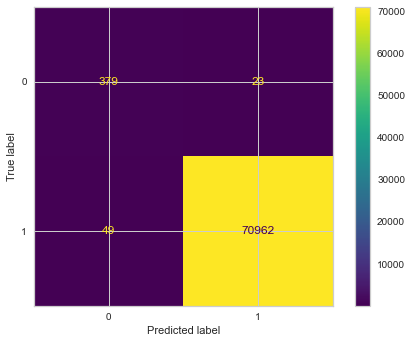

In [44]:

print(accuracy_score(y_val, ypred))
print(f1_score(y_val, ypred))
plot_confusion_matrix(model, data_cleaned_test, y_val)

In [45]:
import timeit
strt = timeit.timeit()
model.predict(data_cleaned_test[::1])
end = timeit.timeit()
print(end-strt)

-0.00025229999982911977


In [2]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import rfecv



In [48]:

# Load classification dataset
X, y = xtrain, ytrain

cv = StratifiedKFold(5)
visualizer = rfecv(RandomForestClassifier(), X=X, y=y, cv=cv, scoring='f1_weighted')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [ ]:
# # Create the RFE object and compute a cross-validated score.
# svc = SVC(kernel="linear")
# # The "accuracy" scoring shows the proportion of correct classifications

# min_features_to_select = 1  # Minimum number of features to consider
# rfecv = RFECV(
#     estimator=svc,
#     step=1,
#     cv=StratifiedKFold(2),
#     scoring="accuracy",
#     min_features_to_select=min_features_to_select,
# )

In [ ]:
#rfecv.fit(xtrain,ytrain)

#print("Optimal number of features : %d" % rfecv.n_features_)


In [ ]:
# # Plot number of features VS. cross-validation scores
# plt.figure()
# plt.xlabel("Number of features selected")
# plt.ylabel("Cross validation score (accuracy)")
# plt.plot(
#     range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
#     rfecv.grid_scores_,
# )
# plt.show()